#Random Forest
- jeden z najbardziej efektywnych sposobów klasyfikacji, kalkuluje średnią ze wszystkich predykcji, co również redukuje bias,
- dość trudny w interpretacji, określany jako 'black box model',
- zapewnia szybkie porównanie znaczenia danych cech dla modelu (*feature_importances*).


In [107]:
from fastai.collab import *
import pandas as pd
from google.colab import drive
root_dir = "/content/gdrive/My Drive/ml/"

Mounted at /content/gdrive


In [108]:
path = Path(root_dir)
path.ls()

[PosixPath('/content/gdrive/My Drive/ml/score_board.csv'),
 PosixPath('/content/gdrive/My Drive/ml/Audition Task - DS & MLE p.pdf'),
 PosixPath('/content/gdrive/My Drive/ml/graduates.csv')]

In [304]:
graduates = pd.read_csv(path/'graduates.csv', delimiter=',')
len(graduates)

7009

In [110]:
score_board = pd.read_csv(path/'score_board.csv', delimiter=',')
len(score_board)

46478

In [111]:
graduates.head()

,id,graduated
0,CS-1980-00002,False
1,CS-1980-00004,True
2,CS-1980-00007,True
3,CS-1980-00008,False
4,CS-1980-00012,True


In [112]:
score_board.head()

,id,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,accepted
0,CS-1980-00001,1980,1.674275,0.082557,0.084508,0.008007,4,0.091328,0.012596,276,False
1,CS-1980-00002,1980,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,True
2,CS-1980-00003,1980,1.500251,0.075756,0.002541,0.216737,3,0.008463,0.001737,276,False
3,CS-1980-00004,1980,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,True
4,CS-1980-00005,1980,2.884417,0.396614,0.478490,0.180828,3,0.638742,0.182141,554,False


In [0]:
data_predict=score_board.drop(['id','year','accepted'],axis=1)

In [243]:
data_predict.head()
len(data_predict)
X_predict = data_predict.copy()
X_predict = pd.get_dummies(X_predict, columns=['social_activity'], prefix = ['social_activity'])
X_predict.head()

,gpa,maths_exam,art_exam,language_exam,essay_score,interview_score,score,social_activity_1,social_activity_2,social_activity_3,social_activity_4,social_activity_5
0,1.674275,0.082557,0.084508,0.008007,0.091328,0.012596,276,0,0,0,1,0
1,3.743429,0.898700,0.978949,0.937879,0.991515,0.999604,857,0,0,0,1,0
2,1.500251,0.075756,0.002541,0.216737,0.008463,0.001737,276,0,0,1,0,0
3,3.047625,0.993001,0.950673,0.763701,0.996858,0.949954,841,0,0,0,0,1
4,2.884417,0.396614,0.478490,0.180828,0.638742,0.182141,554,0,0,1,0,0


In [113]:
grads_data=graduates.merge(score_board[['id','year','gpa','maths_exam','art_exam','language_exam','social_activity','essay_score','interview_score','score']])
grads_data.head()

,id,graduated,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score
0,CS-1980-00002,False,1980,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857
1,CS-1980-00004,True,1980,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841
2,CS-1980-00007,True,1980,2.897191,0.718591,0.941583,0.489207,4,0.980957,0.912487,811
3,CS-1980-00008,False,1980,3.948450,0.953325,0.981074,0.914729,1,0.999489,0.997138,875
4,CS-1980-00012,True,1980,3.939870,0.452506,0.952712,0.974585,4,0.940924,0.973076,790


In [114]:
len(grads_data)

7009

In [115]:
#sprawdzenie kompletności danych
def percentage(numerator, denomenator):
    if type(numerator) == pd.core.series.Series:
        return (numerator/denomenator*100).map('{:.1f}%'.format)
    elif type(numerator) == int or type(numerator) == float:
        return '{:.1f}%'.format(float(numerator)/float(denomenator)*100) 
    else:
        print("check type")
        
percentage(grads_data.count()-1, grads_data.shape[0]-1)

id                 100.0%
graduated          100.0%
year               100.0%
gpa                100.0%
maths_exam         100.0%
art_exam           100.0%
language_exam      100.0%
social_activity    100.0%
essay_score        100.0%
interview_score    100.0%
score              100.0%
dtype: object

In [0]:
#Usuwamy ze zbioru cech dane na temat roku, id  i informację, czy student ukończył studia.
features=grads_data.drop(['graduated','id','year'],axis=1)
targets=grads_data['graduated']

In [158]:
features.head()

,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score
0,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857
1,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841
2,2.897191,0.718591,0.941583,0.489207,4,0.980957,0.912487,811
3,3.948450,0.953325,0.981074,0.914729,1,0.999489,0.997138,875
4,3.939870,0.452506,0.952712,0.974585,4,0.940924,0.973076,790


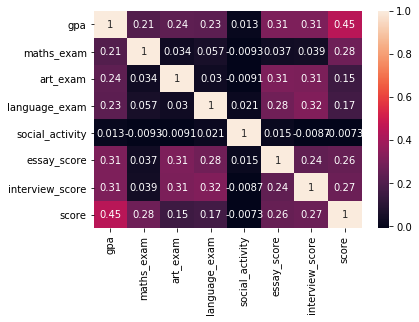

In [194]:
import seaborn as sns
sns.heatmap(features.corr(), annot=True)


Heatmap pokazuje wzajemne zależności między cechami zbioru danych.  W większości 

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)
model=RandomForestClassifier(n_estimators=100 ,n_jobs=1, oob_score=True, random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [196]:
roc=model.oob_score_
roc

0.6638130907793829

In [197]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=features.columns).sort_values(ascending=False)
feature_imp

maths_exam         0.142361
gpa                0.139550
score              0.137730
interview_score    0.135356
essay_score        0.134253
language_exam      0.130063
art_exam           0.129105
social_activity    0.051581
dtype: float64

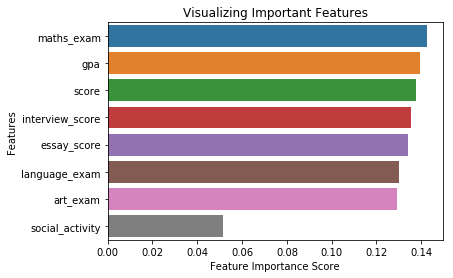

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Na podstawie wykresu widzimy, że cechą o najmniejszym znaczeniu jest 'social_activity'. Najważniejsze cechy to *gpa*, *score* i *math_exam*.

In [199]:
features.describe(include='all')


,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score
count,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000
mean,3.594377,0.851056,0.815081,0.814123,3.000143,0.934669,0.936532,853.515623
std,0.329060,0.192624,0.224290,0.227928,1.421410,0.130732,0.131171,105.485478
min,1.850764,0.009699,0.002378,0.005865,1.000000,0.002230,0.004825,561.000000
25%,3.420754,0.801365,0.739754,0.733354,2.000000,0.941314,0.944835,783.000000
50%,3.676011,0.931921,0.912559,0.916296,3.000000,0.985999,0.986613,839.000000
75%,3.847615,0.979433,0.975063,0.976982,4.000000,0.996801,0.997046,925.000000
max,3.999989,0.999921,0.999858,0.999942,5.000000,0.999996,0.999996,1115.000000


# Poprawa jakości danych wejściowych poprzez one-hot encoding:



In [200]:
X_one_hot_encoding = features.copy()
X_one_hot_encoding = pd.get_dummies(X_one_hot_encoding, columns=['social_activity'], prefix = ['social_activity'])
X_one_hot_encoding.head()

,gpa,maths_exam,art_exam,language_exam,essay_score,interview_score,score,social_activity_1,social_activity_2,social_activity_3,social_activity_4,social_activity_5
0,3.743429,0.898700,0.978949,0.937879,0.991515,0.999604,857,0,0,0,1,0
1,3.047625,0.993001,0.950673,0.763701,0.996858,0.949954,841,0,0,0,0,1
2,2.897191,0.718591,0.941583,0.489207,0.980957,0.912487,811,0,0,0,1,0
3,3.948450,0.953325,0.981074,0.914729,0.999489,0.997138,875,1,0,0,0,0
4,3.939870,0.452506,0.952712,0.974585,0.940924,0.973076,790,0,0,0,1,0


In [203]:
#normalizacja danych
sc = StandardScaler()
X = sc.fit_transform(X_one_hot_encoding)
x_train, x_test, y_train, y_test = train_test_split(X, targets, test_size=0.2)
model=RandomForestClassifier(n_estimators=100, n_jobs=1, oob_score=True, random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [204]:
roc=model.oob_score_
roc

0.6704119850187266

trees 30
roc  0.6454431960049938

trees 50
roc  0.6598894239343678

trees 100
roc  0.6704119850187266

trees 200
roc  0.6800428036383093

trees 500
roc  0.6830747280185483

trees 1000
roc  0.6820046370608168



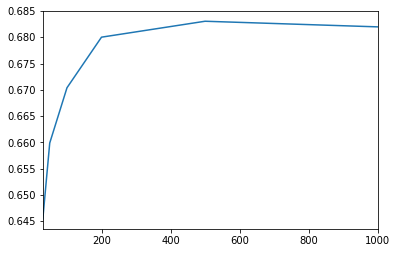

In [205]:
results=[]
n_estimator_options=[30,50,100,200,500,1000]
#szukanie najlepszej wartosci n_estimator, ocena przy pomocy oob score 

for tree in n_estimator_options:
  model=RandomForestClassifier(n_estimators=tree,n_jobs=1, oob_score=True, random_state=42)
  model.fit(x_train,y_train)
  print("trees",tree)
  roc=model.oob_score_
  print ("roc ", roc)
  results.append(roc)
  print ("")
  
pd.Series(results,n_estimator_options).plot();

Z wykresu wynika, że odpowiednim parametrem n_estimators jest 500.

leaves 1
roc  0.6830747280185483

leaves 2
roc  0.6830747280185483

leaves 3
roc  0.6869983948635634

leaves 4
roc  0.685928303905832

leaves 5
roc  0.6884251828072053

leaves 6
roc  0.686641697877653

leaves 7
roc  0.6902086677367576

leaves 8
roc  0.6903870162297129

leaves 9
roc  0.6914571071874442

leaves 10
roc  0.6934189406099518

leaves 11
roc  0.6914571071874442

leaves 12
roc  0.6930622436240413

leaves 13
roc  0.69199215266631

leaves 14
roc  0.6928838951310862

leaves 15
roc  0.6939539860888175

leaves 16
roc  0.6925271981451757

leaves 17
roc  0.6918138041733547

leaves 18
roc  0.6927055466381309

leaves 19
roc  0.6916354556803995



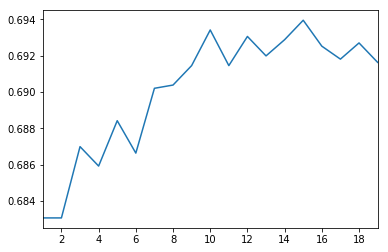

In [206]:
min_samples_leaf=np.arange(1,20,1)


#szukanie najlepszej wartosci n_estimator, ocena przy pomocy oob score 
results=[]

for leaf in min_samples_leaf:
  model=RandomForestClassifier(n_estimators=500,n_jobs=1, oob_score=True, min_samples_leaf=leaf, random_state=42)
  model.fit(x_train,y_train)
  print("leaves",leaf)
  roc=model.oob_score_
  print ("roc ", roc)
  results.append(roc)
  print ("")
  
pd.Series(results,min_samples_leaf).plot();

Z wykresu wynika, że optymalnym parametrem min_samples_leaf jest liczba 15.


In [207]:
# max_features
max_features=['auto','sqrt','log2']

#szukanie najlepszej wartosci max_features, ocena przy pomocy oob score 
results=[]

for i in max_features:
  model=RandomForestClassifier(n_estimators=500,n_jobs=1, oob_score=True, max_features=i, random_state=42)
  model.fit(x_train,y_train)
  print("max_features",i)
  roc=model.oob_score_
  print ("roc ", roc)
  results.append(roc)
  print ("")
  
# pd.Series(results,max_features).plot();

max_features auto
roc  0.6830747280185483

max_features sqrt
roc  0.6830747280185483

max_features log2
roc  0.6830747280185483



Zastosowanie opcji 'auto' jest w tym przypadku najlepszym rozwiązaniem.

In [305]:
 model=RandomForestClassifier(n_estimators=500, n_jobs=1, oob_score=True, max_features='auto', min_samples_leaf=10, random_state=42)
 model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [274]:
train_pred = model.predict(x_train)
model.oob_score_

0.6934189406099518

In [275]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train, train_pred)
score

0.7736757624398074

In [276]:
test_pred = model.predict(x_test)
model.oob_score_

0.6934189406099518

In [277]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, test_pred)
score

0.6626248216833096

In [297]:
predictions = model.predict_proba(X_predict)
predictions

array([[0.188946, 0.811054],
       [0.2267  , 0.7733  ],
       [0.255424, 0.744576],
       [0.141882, 0.858118],
       ...,
       [0.287447, 0.712553],
       [0.130658, 0.869342],
       [0.196911, 0.803089],
       [0.21529 , 0.78471 ]])

In [299]:
len(dataset)

46478

In [301]:
dataset = pd.DataFrame({'Probability1':predictions[:,0],'Probability2':predictions[:,1]}).round(2)
dataset.head()

,Probability1,Probability2
0,0.19,0.81
1,0.23,0.77
2,0.26,0.74
3,0.14,0.86
4,0.19,0.81


In [300]:
dataset.describe()

,Probability1,Probability2
count,46478.000000,46478.000000
mean,0.225386,0.774614
std,0.058030,0.058030
min,0.070000,0.570000
25%,0.190000,0.740000
50%,0.230000,0.770000
75%,0.260000,0.810000
max,0.430000,0.930000


Średnie prawdopodobieństwo z jakim model określa przynależność danej osoby do grupy, która skończy uczelnię lub nie, wynosi 77,5%.




In [303]:
pd.concat([score_board,dataset], sort=False, axis=1).head()

,id,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,accepted,Probability1,Probability2
0,CS-1980-00001,1980,1.674275,0.082557,0.084508,0.008007,4,0.091328,0.012596,276,False,0.19,0.81
1,CS-1980-00002,1980,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,True,0.23,0.77
2,CS-1980-00003,1980,1.500251,0.075756,0.002541,0.216737,3,0.008463,0.001737,276,False,0.26,0.74
3,CS-1980-00004,1980,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,True,0.14,0.86
4,CS-1980-00005,1980,2.884417,0.396614,0.478490,0.180828,3,0.638742,0.182141,554,False,0.19,0.81


**Raport końcowy**

---
Dane wykorzystane do zbudowania modelu ograniczone zostały tylko do danych studentów uczelni, o których wiadomo czy ukończyli studia.
Kolumna social_activity zawiera zmienne kategoryczne, dlatego zastosowano *one-hot encoding*. Dane w tabeli zostały poddane normalizacji, która najbardziej potrzebna była dla kolumn *gpa* i *score*. 
Model został zbudowany w oparciu o RandomForestClassifier, przy pomocy którego można szybko otrzymać miarodajne wyniki.
Ewaluacja modelu przeprowadzona została przy użyciu *accuracy_score* i *oob_score*.
